### 딥-러닝 과정 Mulit Layer Perceptron(MLP) 

## Simple Keras 모델 생성/학습 - AND Function

In [1]:
%config Completer.use_jedi = False

In [4]:
# 1. Numpy 가져오기
import numpy as np
import pandas as pd

In [5]:
# 2. 입력/출력 데이터 만들기
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[0],[0],[1]])

print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


In [6]:
# 3. Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers

print(keras.__version__)

2.4.0


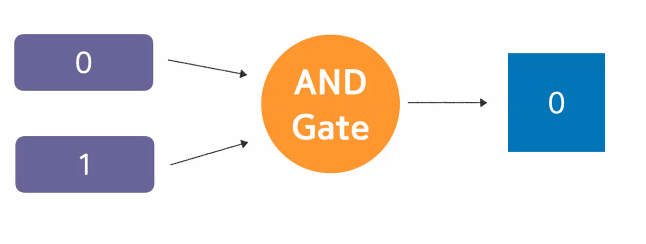

In [7]:
# 4. Perceptron 모델 생성
# 위의 모델처럼 간단한 모델링 하기. 인풋 받아서 바로 아웃풋 생성이 되니, 여기서는 RELI
#의 함수를 쓰지 않고 바로 sigmoid를 사용한다. 
#input precessing

model = keras.Sequential()
model.add(layers.Dense(input_dim=2, units=1))
model.add(layers.Activation('sigmoid'))
#------------------------------------
# 위의 코드를 한줄로 표현하기 model.add(Dense(units=1, input_dim=2, activation='sigmoid'))



model.summary()


#아래의 경우는 layer가 더 많을 경우 쓴다. 
#output processing
#odel.add(layers.Dense(units=1))
#model.add(layers.Activation('sigmoid'))

# parameter 의 갯수가 3개로 나타나게 되는데
# 사싨 w는 2이지만, 1개의 bias가 추가되어 나타난다. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 5. Compile - Optimizer, Loss function 설정

# 그림에서오 같이 이진분류 이니 아래와 같이 사용한다. 
sgd= keras.optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

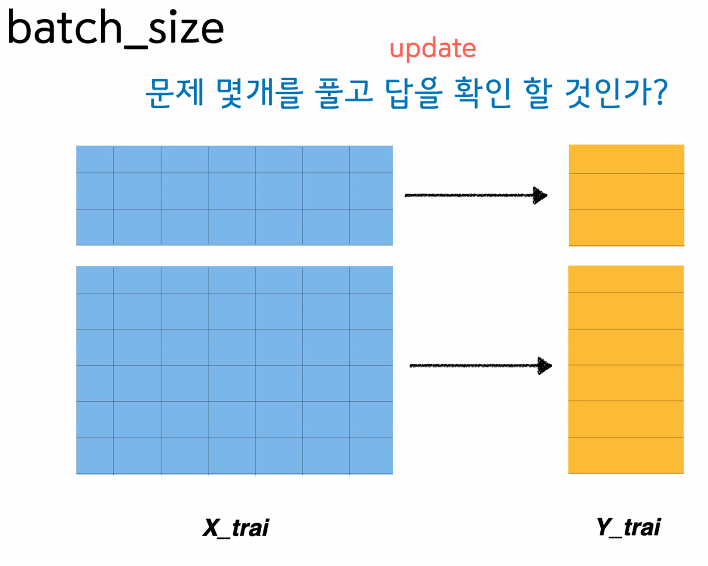

In [11]:
# 6. 학습시키기 -> 모델에게 데이터를 보여주는 단계이다. 
# epochs -> 몇번 반복할 것인가. 


model.fit(X,y,
         batch_size=1,
          epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4661
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3357
Epoch 3/100
4/4 [==============================] - 0s 929us/step - loss: 0.3161
Epoch 4/100
4/4 [==============================] - 0s 874us/step - loss: 0.4178
Epoch 5/100
4/4 [==============================] - 0s 843us/step - loss: 0.3635
Epoch 6/100
4/4 [==============================] - 0s 866us/step - loss: 0.3692
Epoch 7/100
4/4 [==============================] - 0s 862us/step - loss: 0.3862
Epoch 8/100
4/4 [==============================] - 0s 833us/step - loss: 0.4014
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3077
Epoch 10/100
4/4 [==============================] - 0s 846us/step - loss: 0.3441
Epoch 11/100
4/4 [==============================] - 0s 843us/step - loss: 0.3944
Epoch 12/100
4/4 [==============================] - 0s 821us/step - loss: 0.2896
Epoch 13/100
4/4 [=========================

In [12]:
# 7. 모델 테스트하기
test_data = np.array([[0,1],[0,0],[1,1]])

In [13]:
print(model.predict(test_data))

[[0.19585738]
 [0.02519354]
 [0.7100987 ]]


In [14]:
print(model.predict_classes(test_data))

[[0]
 [0]
 [1]]


/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
